<a href="https://colab.research.google.com/github/inesfrsantos/MachineLearning/blob/main/Copy_of_Model_Attempt_3_Black.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Download the necessary packages
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from PIL import Image
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler
from keras.utils import to_categorical

In [14]:
#Load the data
test = 'https://raw.githubusercontent.com/inesfrsantos/MachineLearning/main/Dataset/CleanedDataset/test_df_no_pca.csv'
test = pd.read_csv(test, sep=',')

train = 'https://raw.githubusercontent.com/inesfrsantos/MachineLearning/main/Dataset/CleanedDataset/train_df_no_pca.csv'
train = pd.read_csv(train, sep=',')

val = 'https://raw.githubusercontent.com/inesfrsantos/MachineLearning/main/Dataset/CleanedDataset/valid_df_no_pca.csv'
val = pd.read_csv(val, sep=',')

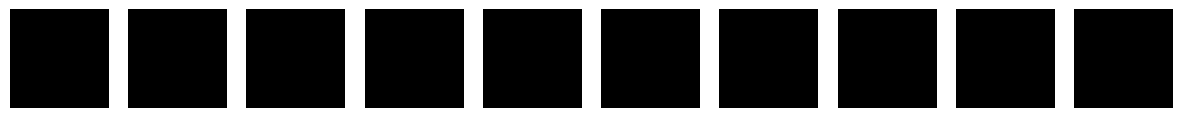

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Select a random subset of images
num_samples_to_visualize = 10  # Replace with the number of images you want to visualize
sample_indices = np.random.choice(len(X_train), num_samples_to_visualize, replace=False)

# Visualize the images
fig, axes = plt.subplots(1, num_samples_to_visualize, figsize=(15, 5))
for i, ax in enumerate(axes):
    ax.imshow(X_train[sample_indices[i]], cmap='gray')
    ax.axis('off')
plt.show()


In [5]:
#Separate columns
X_train = train['image'].apply(lambda x: np.fromstring(x,  sep=',', dtype=np.uint8))
y_train = train['label']

X_test = test['image'].apply(lambda x: np.fromstring(x, sep=',',dtype=np.uint8))
y_test = test['label']

X_val = val['image'].apply(lambda x: np.fromstring(x, sep=',', dtype=np.uint8))
y_val = val['label']

<ipython-input-5-4900bbc338f7>:2: DeprecationWarning: string or file could not be read to its end due to unmatched data; this will raise a ValueError in the future.
  X_train = train['image'].apply(lambda x: np.fromstring(x,  sep=',', dtype=np.uint8))
<ipython-input-5-4900bbc338f7>:5: DeprecationWarning: string or file could not be read to its end due to unmatched data; this will raise a ValueError in the future.
  X_test = test['image'].apply(lambda x: np.fromstring(x, sep=',',dtype=np.uint8))
<ipython-input-5-4900bbc338f7>:8: DeprecationWarning: string or file could not be read to its end due to unmatched data; this will raise a ValueError in the future.
  X_val = val['image'].apply(lambda x: np.fromstring(x, sep=',', dtype=np.uint8))


In [6]:
# Define a fixed image size
img_size = (64, 64)

# Resize images to the fixed size
X_resized = []
for img in X_train:
    img = Image.fromarray(img)
    img = img.resize(img_size)
    img = np.asarray(img)
    X_resized.append(img)

# Stack the resized images
X_train = np.stack(X_resized).reshape(-1, 64, 64, 1)

# Resize images to the fixed size
X_resized = []
for img in X_test:
    img = Image.fromarray(img)
    img = img.resize(img_size)
    img = np.asarray(img)
    X_resized.append(img)

# Stack the resized images
X_test = np.stack(X_resized).reshape(-1, 64, 64, 1)

# Resize images to the fixed size
X_resized = []
for img in X_val:
    img = Image.fromarray(img)
    img = img.resize(img_size)
    img = np.asarray(img)
    X_resized.append(img)

# Stack the resized images
X_val = np.stack(X_resized).reshape(-1, 64, 64, 1)

In [7]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_test = le.fit_transform(test["label"])
y_train = le.transform(train["label"])
y_val = le.transform(val["label"])


In [8]:
# Convert the labels to one-hot encoding
num_classes = 32
y_train = to_categorical(y_train, num_classes)
y_val = to_categorical(y_val, num_classes)
y_test = to_categorical(y_test, num_classes)

In [ ]:
X_train.shape

(23187, 64, 64, 1)

In [ ]:
y_train.shape

(23187, 32)

# Simple self made CNN

In [ ]:
# Load packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import numpy as np

# Define the input shape
input_shape = (64, 64, 1)

# Initialize the model
model = Sequential()

# Add the first convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=input_shape))

# Add the first max pooling layer
model.add(MaxPooling2D((2, 2)))

# Add the second convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu'))

# Add the second max pooling layer
model.add(MaxPooling2D((2, 2)))

# Add the flatten layer
model.add(Flatten())

# Add the dense layer
model.add(Dense(128, activation='relu'))

# Add the dropout layer
model.add(Dropout(0.5))

# Add the output layer
model.add(Dense(32, activation='softmax'))

def lr_decay(epoch):
    return 0.01 * 0.9 ** epoch

optimizer = Adam(learning_rate=0.01)

lr_scheduler = LearningRateScheduler(lr_decay)

# Compile the model
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model on the test set
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Epoch 1/10
725/725 [==============================] - 247s 339ms/step - loss: 3.4542 - accuracy: 0.0425 - val_loss: 3.4590 - val_accuracy: 0.0454
Epoch 2/10
461/725 [==================>...........] - ETA: 1:21 - loss: 3.4527 - accuracy: 0.0435

KeyboardInterrupt: ignored

# Complex Sef Made CNN

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers


# Define the model
model = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), padding='same', input_shape=(64, 64, 1), activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),
    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(32, activation='softmax')
])

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train,
                    epochs=50, batch_size=32, validation_data=(X_val, y_val))


Epoch 1/50
379/725 [==============>...............] - ETA: 7:30 - loss: 3.4560 - accuracy: 0.0442

KeyboardInterrupt: ignored

The architecture used for Arabic sign language image classification is effective because it includes more layers and parameters, allowing the model to learn more complex features from the images. The use of batch normalization helps to normalize the input, which can improve the convergence of the model during training. The addition of dropout layers helps to prevent overfitting by randomly dropping out nodes during training. The use of multiple convolutional and max pooling layers allows the model to learn hierarchical representations of the input images, capturing both local and global features. This architecture can handle more complex patterns and variations in the input data compared to a simpler model with only a few layers, like the simple CNN.

# GoogLeNet Inspired CNN

## Option 2

In [9]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Concatenate, AveragePooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model

def inception_module(x, filters_1x1, filters_3x3_reduce, filters_3x3, filters_5x5_reduce, filters_5x5, filters_pool_proj):
    conv_1x1 = Conv2D(filters_1x1, (1, 1), padding='same', activation='relu')(x)
    
    conv_3x3_reduce = Conv2D(filters_3x3_reduce, (1, 1), padding='same', activation='relu')(x)
    conv_3x3 = Conv2D(filters_3x3, (3, 3), padding='same', activation='relu')(conv_3x3_reduce)
    
    conv_5x5_reduce = Conv2D(filters_5x5_reduce, (1, 1), padding='same', activation='relu')(x)
    conv_5x5 = Conv2D(filters_5x5, (5, 5), padding='same', activation='relu')(conv_5x5_reduce)
    
    max_pool = MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    pool_proj = Conv2D(filters_pool_proj, (1, 1), padding='same', activation='relu')(max_pool)
    
    output = Concatenate(axis=-1)([conv_1x1, conv_3x3, conv_5x5, pool_proj])
    return output

input_layer = Input(shape=(64, 64, 1))
x = Conv2D(64, (7, 7), padding='same', strides=(1, 1), activation='relu')(input_layer)
x = MaxPooling2D((3, 3), padding='same', strides=(1, 1))(x)
x = Conv2D(64, (1, 1), padding='same', activation='relu')(x)
x = Conv2D(192, (3, 3), padding='same', activation='relu')(x)
x = MaxPooling2D((3, 3), padding='same', strides=(1, 1))(x)

x = inception_module(x, 64, 96, 128, 16, 32, 32)
x = inception_module(x, 128, 128, 192, 32, 96, 64)
x = MaxPooling2D((3, 3), padding='same', strides=(1, 1))(x)

x = inception_module(x, 192, 96, 208, 16, 48, 64)
x = inception_module(x, 160, 112, 224, 24, 64, 64)
x = inception_module(x, 128, 128, 256, 24, 64, 64)
x = inception_module(x, 112, 144, 288, 32, 64, 64)
x = inception_module(x, 256, 160, 320, 32, 128, 128)
x = MaxPooling2D((3, 3), padding='same', strides=(1, 1))(x)

x = inception_module(x, 256, 160, 320, 32, 128, 128)
x = inception_module(x, 384, 192, 384, 48, 128, 128)

x = AveragePooling2D((4, 4), strides=(1, 1), padding='valid')(x)

x = Flatten()(x)
x = Dropout(0.4)(x)
x = Dense(32, activation='softmax')(x)

model = Model(inputs=input_layer, outputs=x)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [10]:
# Fit the model
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_val, y_val), verbose=1)

# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=1)

# Print the validation loss and accuracy
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")


Epoch 1/10
725/725 [==============================] - 1120s 1s/step - loss: 3.4588 - accuracy: 0.0435 - val_loss: 3.4562 - val_accuracy: 0.0454
Epoch 2/10
725/725 [==============================] - 1042s 1s/step - loss: 3.4525 - accuracy: 0.0449 - val_loss: 3.4546 - val_accuracy: 0.0454
Epoch 3/10
725/725 [==============================] - 991s 1s/step - loss: 3.4510 - accuracy: 0.0449 - val_loss: 3.4544 - val_accuracy: 0.0454
Epoch 4/10
725/725 [==============================] - ETA: 0s - loss: 3.4506 - accuracy: 0.0449

KeyboardInterrupt: ignored

The proposed architecture is inspired by GoogLeNet, which is a well-known deep learning architecture used for image classification tasks. In the case of Arabic sign language classification, the proposed model takes grayscale images of size 64x64 pixels as input and passes them through a series of convolutional and pooling layers to extract features at different scales. The added layers in this model help improve its accuracy and enhance the ability of the model to capture complex patterns in the input images.

In particular, the inception modules in the proposed architecture are designed to capture both local and global features of the input images, which is essential for recognizing signs in Arabic sign language. Additionally, the added dropout layer helps prevent overfitting by randomly dropping out some of the neurons during training, which improves the model's generalization ability.

Overall, the proposed architecture is well-suited for the classification task of Arabic sign language because it can effectively capture the intricate hand gestures and motions that are involved in this language.
